### OpenCVによる物体検出
- 物体検出を行う場合，学習データ（大量の検出したい物体が映っている画像と検出したい物体が映っていない画像）を用意し，検出したい物体の特徴をコンピュータで学習させる
- 学習用データから得られた特徴をまとめたデータ「カスケード分類器」を作成する

- OpenCVには学習済みカスケード分類器（https://github.com/opencv/opencv/tree/master/data/haarcascades ）が用意されているため，本演習ではこれを使用する
    - カスケード分類器を自作することで，任意の物体を検出するプログラムを作成できる

- 学習済み分類器の一例

| ファイル名 | 対象物体 |
| ---- |------|
| haarcascade_frontalface_default.xml | 正面顔  |
| haarcascade_fullbody.xml | 全身   |
| haarcascade_eye.xml | 目    |
| haarcascade_frontalcatface.xml | 正面猫顔 |
| haarcascade_upperbody.xml | 上半身 |

- 講義で扱うファイルをiTossにuploadしております

適用画像（person-sample.jpg）

<img src="fig/person-sample.jpg" width="15%">

- 適用画像（person-sample2.jpg）

<img src="fig/person-sample2.jpg" width="25%">

### 学習済みカスケード分類器の使い方
- 学習済みカスケード分類器を使うためには，```cv2.CascadeClassifier()```を使用する
```
カスケード分類器変数 = cv2.CascadeClassifier('分類器のファイル名')
```
- 分類器にデータを入力する場合，```detectMultiScale()```を使用する
```
分類結果 = カスケード分類器変数.detectMultiScale(データ変数)
```


In [83]:
import cv2
import matplotlib.pyplot as plt

# カスケード型分類器の読み込み
cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

# データ読み込み
image = cv2.imread("person-sample.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 読み込んだデータを分類器に適用
result = cascade.detectMultiScale(image)

### 分類結果の扱い方
- ```print(len(分類結果変数))```とすることで，検知数を取得できる
- ```print(分類結果変数)```とすることで，検知した結果を取得できる
    - 1つ目の結果にアクセスする場合は```print(分類結果変数[0])```とする
    - 2つ目の結果にアクセスする場合は```print(分類結果変数[1])```とする
    - n番目の結果にアクセスする場合は```print(分類結果変数[n-1])```とする
- **コンピュータでは0番から数えるため注意が必要**

In [84]:
print(len(result))
print(result)
print(result[0])

1
[[319 431 151 151]]
[319 431 151 151]


- n番目の結果にアクセスした時（```print(分類結果変数[n-1])```）に得られた結果である```[整数A, 整数B, 整数C, 整数D]```は検知した長方形領域（バウンディングボック）のパラメータを示す
    - 整数Aが長方形領域の左上のX座標，アクセス方法: ```分類結果変数[n-1][0]```
    - 整数Bが長方形領域の左上のY座標，アクセス方法: ```分類結果変数[n-1][1]```
    - 整数Cが長方形領域の幅，アクセス方法: ```分類結果変数[n-1][2]```
    - 整数Dが長方形領域の高さ，アクセス方法: ```分類結果変数[n-1][3]```
- 検知した長方形領域を```cv2.rectangle()```を使用して取り囲んで表示する

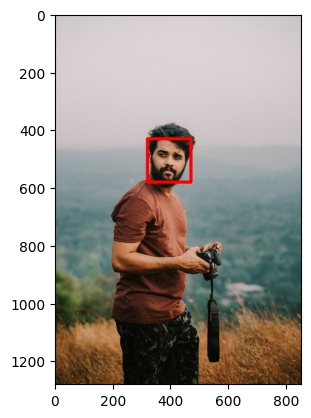

In [85]:
x = result[0][0]
y = result[0][1]
w = result[0][2]
h = result[0][3]
cv2.rectangle(image, (x, y, w, h), (255, 0, 0), 10)
plt.imshow(image)
plt.show()

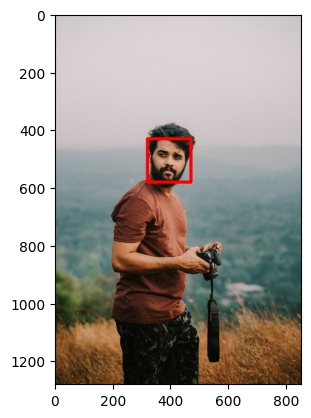

In [86]:
# まとめると
import cv2
import matplotlib.pyplot as plt

# カスケード型分類器の読み込み
cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

# データ読み込み
image = cv2.imread("person-sample.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 読み込んだデータを分類器に適用
result = cascade.detectMultiScale(image)

x = result[0][0]
y = result[0][1]
w = result[0][2]
h = result[0][3]
cv2.rectangle(image, (x, y, w, h), (255, 0, 0), 10)
plt.imshow(image)
plt.show()

In [87]:
# 複数人
import cv2
import matplotlib.pyplot as plt

# カスケード型分類器の読み込み
cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

# データ読み込み
image = cv2.imread("person-sample2.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 読み込んだデータを分類器に適用
result = cascade.detectMultiScale(image)

len(result)

3

- 検知数が多いため，誤検知していることがわかる
- そこで結果を表示する

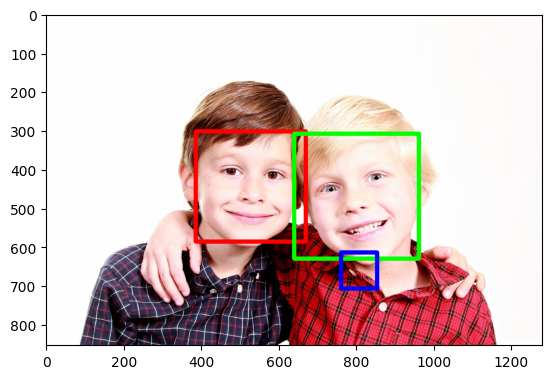

In [88]:
x0 = result[0][0]
y0 = result[0][1]
w0 = result[0][2]
h0 = result[0][3]
cv2.rectangle(image, (x0, y0, w0, h0), (255, 0, 0), 10)

x1 = result[1][0]
y1 = result[1][1]
w1 = result[1][2]
h1 = result[1][3]
cv2.rectangle(image, (x1, y1, w1, h1), (0, 255, 0), 10)

x2 = result[2][0]
y2 = result[2][1]
w2 = result[2][2]
h2 = result[2][3]
cv2.rectangle(image, (x2, y2, w2, h2), (0, 0, 255), 10)

plt.imshow(image)
plt.show()

- 3番目の結果（青枠）が誤検知していることがわかるので，その表示を止める

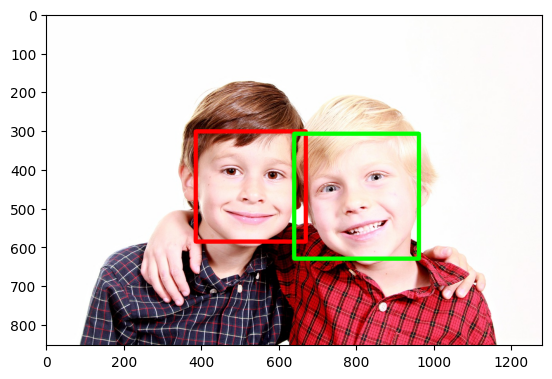

In [113]:
# まとめると
import cv2
import matplotlib.pyplot as plt

# カスケード型分類器の読み込み
cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

# データ読み込み
image = cv2.imread("person-sample2.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 読み込んだデータを分類器に適用
result = cascade.detectMultiScale(image)

# 誤検知は扱わない
x0 = result[0][0]
y0 = result[0][1]
w0 = result[0][2]
h0 = result[0][3]
cv2.rectangle(image, (x0, y0, w0, h0), (255, 0, 0), 10)

x1 = result[1][0]
y1 = result[1][1]
w1 = result[1][2]
h1 = result[1][3]
cv2.rectangle(image, (x1, y1, w1, h1), (0, 255, 0), 10)

plt.imshow(image)
plt.show()

In [114]:
# 猫の検知
import cv2
import matplotlib.pyplot as plt

# カスケード型分類器の読み込み（読み込むファイルを変える）
cascade = cv2.CascadeClassifier("haarcascade_frontalcatface.xml")

# データ読み込み
image = cv2.imread("green_cat.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 読み込んだデータを分類器に適用
result = cascade.detectMultiScale(image)

len(result)

2

- 検知数が多いため，誤検知していることがわかる
- そこで結果を表示する

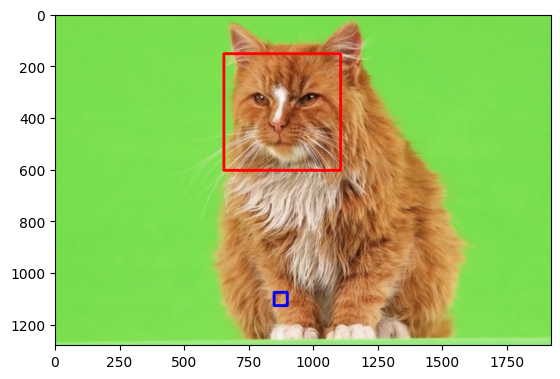

In [115]:
x0 = result[0][0]
y0 = result[0][1]
w0 = result[0][2]
h0 = result[0][3]
cv2.rectangle(image, (x0, y0, w0, h0), (255, 0, 0), 10)

x1 = result[1][0]
y1 = result[1][1]
w1 = result[1][2]
h1 = result[1][3]
cv2.rectangle(image, (x1, y1, w1, h1), (0, 0, 255), 10)

plt.imshow(image)
plt.show()

- 2番目の結果（青枠）が誤検知していることがわかるので，その表示を止める

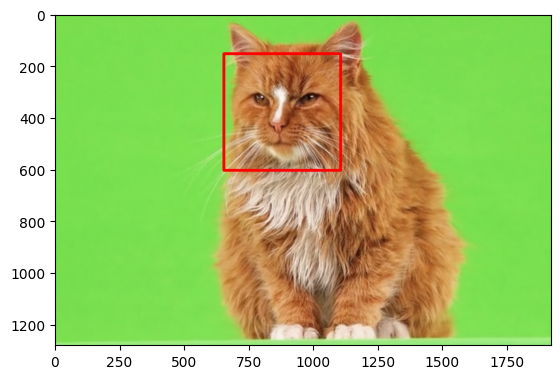

In [116]:
# まとめると
import cv2
import matplotlib.pyplot as plt

# カスケード型分類器の読み込み（読み込むファイルを変える）
cascade = cv2.CascadeClassifier("haarcascade_frontalcatface.xml")

# データ読み込み
image = cv2.imread("green_cat.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 読み込んだデータを分類器に適用
result = cascade.detectMultiScale(image)

# 誤検知は扱わない
x0 = result[0][0]
y0 = result[0][1]
w0 = result[0][2]
h0 = result[0][3]
cv2.rectangle(image, (x0, y0, w0, h0), (255, 0, 0), 10)

plt.imshow(image)
plt.show()

### YuNetによる顔検出
- 最新の顔検出方法であるYuNetを使用する
    - 顔を囲むバウンディングボックスと右目、左目、鼻、右口角、左口角の5箇所を検出できる
    - https://github.com/opencv/opencv_zoo/tree/main/models/face_detection_yunet に詳細が記載されております

### YuNetの使い方
- 学習済みカスケード分類器を使うためには，```cv2.FaceDetectorYN.create()```を使用する
- 学習済みファイル(iTossにuploadしております): ```face_detection_yunet_2023mar.onnx```
```
検出器変数 = cv2.FaceDetectorYN.create("学習済みファイル", "", (0, 0))
```

- 検出器にデータを入力する場合，```setInputSize()```と```detect()```を使用する
```
検出器変数.setInputSize((データ画像の幅, データ画像の高さ))
結果変数1, 結果変数2 = 検出器変数.detect(データ変数)
```
- **結果変数2**に情報が格納されている

In [117]:
import cv2
import matplotlib.pyplot as plt

# YuNetの読み込み
face_detector = cv2.FaceDetectorYN.create("face_detection_yunet_2023mar.onnx", "", (0, 0))

# データ読み込み
image = cv2.imread("person-sample2.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 入力サイズを指定する
height, width, channel = image.shape
face_detector.setInputSize((width, height))

# 顔を検出する
result1, result2 = face_detector.detect(image)

### YuNet結果の扱い方
- ```print(len(結果変数2))```とすることで，検知数を取得できる
- ```print(結果変数2)```とすることで，検知した結果を取得できる
    - 1つ目の結果にアクセスする場合は```print(結果変数2[0])```とする
    - 2つ目の結果にアクセスする場合は```print(結果変数2[1])```とする
    - n番目の結果にアクセスする場合は```print(結果変数2[n-1])```とする

In [118]:
print(len(result2))
print(result2[0])
print(result2[1])

2
[673.829      293.1552     279.114      341.34976    730.10516
 446.01666    853.9047     421.60953    796.21277    501.76535
 761.8499     554.8684     875.31665    534.24677      0.93403465]
[401.2465     274.34882    247.79082    325.27573    476.43835
 406.13788    590.2041     413.1334     533.3597     477.83997
 472.28116    511.49542    578.2695     516.8898       0.93380207]


- n番目の結果にアクセスした時（```print(結果変数2[n-1])```）に得られた結果である**最初の4つの数値**は検知した長方形領域（バウンディングボック）のパラメータを示す
    - 1つ目の値が長方形領域の左上のX座標，アクセス方法: ```結果変数2[n-1][0]```
    - 2つ目の値が長方形領域の左上のY座標，アクセス方法: ```結果変数2[n-1][1]```
    - 3つ目の値が長方形領域の幅，アクセス方法: ```結果変数2[n-1][2]```
    - 4つ目の値が長方形領域の高さ，アクセス方法: ```結果変数2[n-1][3]```
- 検知した長方形領域を```cv2.rectangle()```を使用して取り囲んで表示する
    - 各値が小数なので，すべて**整数型に変更する必要がある**
    - ```int(小数値)```で小数値を整数に変更できる

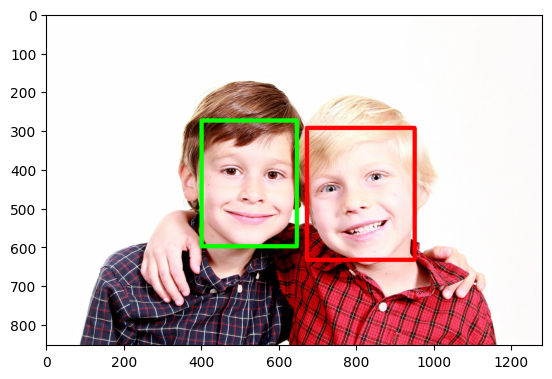

In [119]:
# 一人目のバウンディングボックスを求める
x0 = int(result2[0][0])
y0 = int(result2[0][1])
w0 = int(result2[0][2])
h0 = int(result2[0][3])
cv2.rectangle(image, (x0, y0, w0, h0), (255, 0, 0), 10)

# 二人目のバウンディングボックスを求める
x1 = int(result2[1][0])
y1 = int(result2[1][1])
w1 = int(result2[1][2])
h1 = int(result2[1][3])
cv2.rectangle(image, (x1, y1, w1, h1), (0, 255, 0), 10)

plt.imshow(image)
plt.show()

- n番目の結果にアクセスした時（```print(結果変数2[n-1])```）に得られた結果である**5つ目と6つ目の数値**は『検知した顔における右目の座標』を示す
    - 5つ目の値が右目のx座標，アクセス方法: ```結果変数2[n-1][4]```
    - 6つ目の値が右目のy座標，アクセス方法: ```結果変数2[n-1][5]```
- ```cv2.circle()```を使用して表示できる

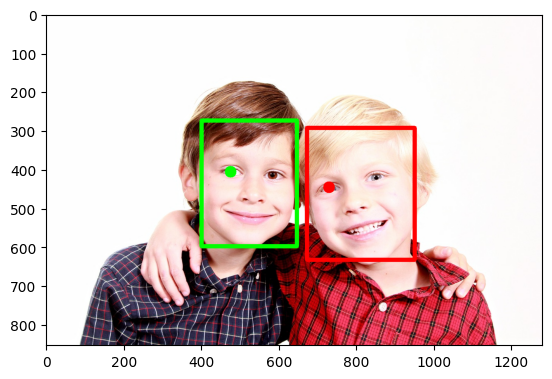

In [120]:
# 一人目の右目を求める
x0 = int(result2[0][4])
y0 = int(result2[0][5])
cv2.circle(image, (x0, y0), 15, (255, 0, 0), -1)

# 二人目の右目を求める
x1 = int(result2[1][4])
y1 = int(result2[1][5])
cv2.circle(image, (x1, y1), 15, (0, 255, 0), -1)

plt.imshow(image)
plt.show()

- n番目の結果にアクセスした時（```print(結果変数2[n-1])```）に得られた結果である**7つ目と8つ目の数値**は『検知した顔における左目の座標』を示す
    - 7つ目の値が左目のx座標，アクセス方法: ```結果変数2[n-1][6]```
    - 8つ目の値が左目のy座標，アクセス方法: ```結果変数2[n-1][7]```

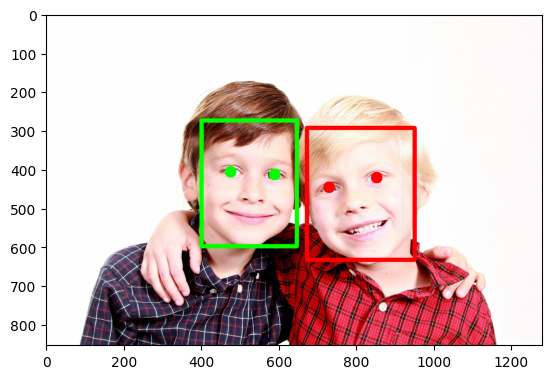

In [121]:
# 一人目の左目を求める
x0 = int(result2[0][6])
y0 = int(result2[0][7])
cv2.circle(image, (x0, y0), 15, (255, 0, 0), -1)

# 二人目の左目を求める
x1 = int(result2[1][6])
y1 = int(result2[1][7])
cv2.circle(image, (x1, y1), 15, (0, 255, 0), -1)

plt.imshow(image)
plt.show()

- n番目の結果にアクセスした時（```print(結果変数2[n-1])```）に得られた結果である**9つ目と10つ目の数値**は『検知した顔における鼻の座標』を示す
    - 9つ目の値が鼻のx座標，アクセス方法: ```結果変数2[n-1][8]```
    - 10つ目の値が鼻のy座標，アクセス方法: ```結果変数2[n-1][9]```

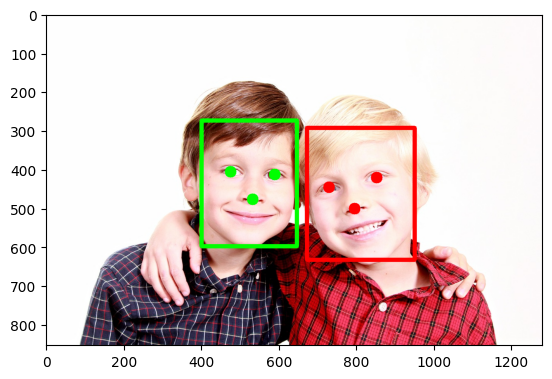

In [122]:
# 一人目の鼻を求める
x0 = int(result2[0][8])
y0 = int(result2[0][9])
cv2.circle(image, (x0, y0), 15, (255, 0, 0), -1)

# 二人目の鼻を求める
x1 = int(result2[1][8])
y1 = int(result2[1][9])
cv2.circle(image, (x1, y1), 15, (0, 255, 0), -1)

plt.imshow(image)
plt.show()

- n番目の結果にアクセスした時（```print(結果変数2[n-1])```）に得られた結果である**11つ目と12つ目の数値**は『検知した顔における右口角の座標』を示す
    - 11つ目の値が右口角のx座標，アクセス方法: ```結果変数2[n-1][10]```
    - 12つ目の値が右口角のy座標，アクセス方法: ```結果変数2[n-1][11]```

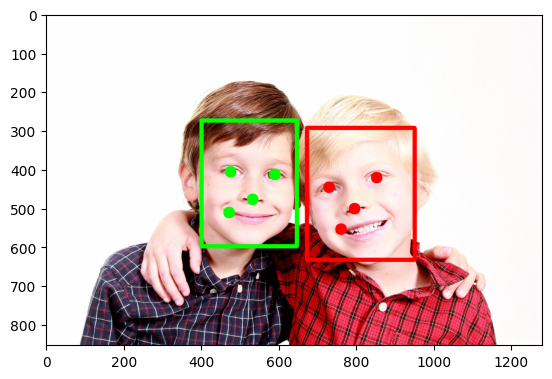

In [123]:
# 一人目の右口角を求める
x0 = int(result2[0][10])
y0 = int(result2[0][11])
cv2.circle(image, (x0, y0), 15, (255, 0, 0), -1)

# 二人目の右口角を求める
x1 = int(result2[1][10])
y1 = int(result2[1][11])
cv2.circle(image, (x1, y1), 15, (0, 255, 0), -1)

plt.imshow(image)
plt.show()

- n番目の結果にアクセスした時（```print(結果変数2[n-1])```）に得られた結果である**13つ目と14つ目の数値**は『検知した顔における右口角の座標』を示す
    - 13つ目の値が左口角のx座標，アクセス方法: ```結果変数2[n-1][12]```
    - 14つ目の値が左口角のy座標，アクセス方法: ```結果変数2[n-1][13]```

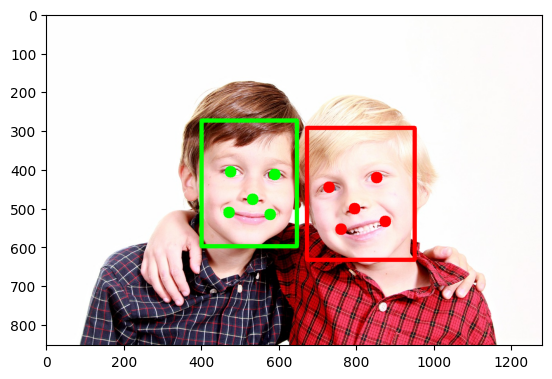

In [124]:
# 一人目の左口角を求める
x0 = int(result2[0][12])
y0 = int(result2[0][13])
cv2.circle(image, (x0, y0), 15, (255, 0, 0), -1)

# 二人目の左口角を求める
x1 = int(result2[1][12])
y1 = int(result2[1][13])
cv2.circle(image, (x1, y1), 15, (0, 255, 0), -1)

plt.imshow(image)
plt.show()

- n番目の結果にアクセスした時（```print(結果変数2[n-1])```）に得られた結果である**15つ目の数値**（最後の値）は『検知した顔に対する信頼度』を示す
    - 15つ目の値が検知した顔に対する信頼度，アクセス方法: ```結果変数2[n-1][14]```
        - この値は小数で問題無い

In [129]:
# 一人目の顔検知信頼度を表示する
print('一人目の顔検知信頼度:', result2[0][14])

# 二人目の顔検知信頼度を表示する
print('二人目の顔検知信頼度:', result2[1][14])

一人目の顔検知信頼度: 0.93403465
二人目の顔検知信頼度: 0.93380207


- 二人とも93\%の信頼度で検知てきでいることがわかる

一人目の顔検知信頼度: 0.93403465
二人目の顔検知信頼度: 0.93380207


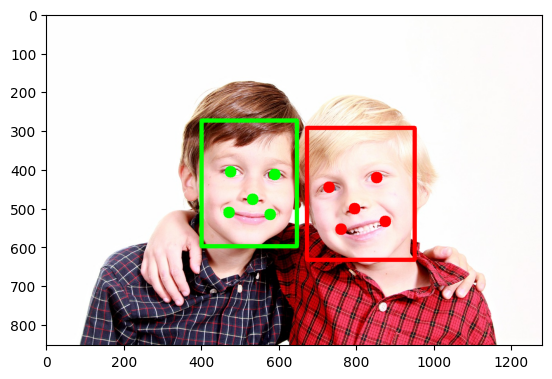

In [130]:
# まとめると

import cv2
import matplotlib.pyplot as plt

# YuNetの読み込み
face_detector = cv2.FaceDetectorYN.create("face_detection_yunet_2023mar.onnx", "", (0, 0))

# データ読み込み
image = cv2.imread("person-sample2.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 入力サイズを指定する
height, width, channel = image.shape
face_detector.setInputSize((width, height))

# 顔を検出する
result1, result2 = face_detector.detect(image)

# 一人目のバウンディングボックスを求める
x0 = int(result2[0][0])
y0 = int(result2[0][1])
w0 = int(result2[0][2])
h0 = int(result2[0][3])
cv2.rectangle(image, (x0, y0, w0, h0), (255, 0, 0), 10)
# 一人目の右目を求める
x0 = int(result2[0][4])
y0 = int(result2[0][5])
cv2.circle(image, (x0, y0), 15, (255, 0, 0), -1)
# 一人目の左目を求める
x0 = int(result2[0][6])
y0 = int(result2[0][7])
cv2.circle(image, (x0, y0), 15, (255, 0, 0), -1)
# 一人目の鼻を求める
x0 = int(result2[0][8])
y0 = int(result2[0][9])
cv2.circle(image, (x0, y0), 15, (255, 0, 0), -1)
# 一人目の右口角を求める
x0 = int(result2[0][10])
y0 = int(result2[0][11])
cv2.circle(image, (x0, y0), 15, (255, 0, 0), -1)
# 一人目の左口角を求める
x0 = int(result2[0][12])
y0 = int(result2[0][13])
cv2.circle(image, (x0, y0), 15, (255, 0, 0), -1)
# 一人目の顔検知信頼度を表示する
print('一人目の顔検知信頼度:', result2[0][14])

# 二人目のバウンディングボックスを求める
x1 = int(result2[1][0])
y1 = int(result2[1][1])
w1 = int(result2[1][2])
h1 = int(result2[1][3])
cv2.rectangle(image, (x1, y1, w1, h1), (0, 255, 0), 10)
# 二人目の右目を求める
x1 = int(result2[1][4])
y1 = int(result2[1][5])
cv2.circle(image, (x1, y1), 15, (0, 255, 0), -1)
# 二人目の左目を求める
x1 = int(result2[1][6])
y1 = int(result2[1][7])
cv2.circle(image, (x1, y1), 15, (0, 255, 0), -1)
# 二人目の鼻を求める
x1 = int(result2[1][8])
y1 = int(result2[1][9])
cv2.circle(image, (x1, y1), 15, (0, 255, 0), -1)
# 二人目の右口角を求める
x1 = int(result2[1][10])
y1 = int(result2[1][11])
cv2.circle(image, (x1, y1), 15, (0, 255, 0), -1)
# 二人目の左口角を求める
x1 = int(result2[1][12])
y1 = int(result2[1][13])
cv2.circle(image, (x1, y1), 15, (0, 255, 0), -1)
# 二人目の顔検知信頼度を表示する
print('二人目の顔検知信頼度:', result2[1][14])

plt.imshow(image)
plt.show()

### 演習問題
1. 以下に示す画像に対して，学習済みカスケード分類器を適用して顔検知を行いなさい，ただし，各バウンディングボックスの色を変えなさい．

- 適用画像（family-sample1.jpg）

<img src="fig/family-sample1.jpg" width="50%">

2. 以下に示す画像に対して，YuNetによる顔検出を適用して顔検知を行いなさい，さらに，各バウンディングボックスの色を変え，右目を強調して表示し，検知信頼度を出力しなさい．

- 適用画像（family-sample2.jpg）

<img src="fig/family-sample2.jpg" width="50%">